In [124]:
import numpy as np # shorthand
#from numba import jit # import object from module
import copy
import pickle # store objects in files
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1. Python scientific computing ecosystem

In [2]:
print? # function info

SyntaxError: invalid syntax (<ipython-input-2-7ca407282e81>, line 1)

In [86]:
%quickref # IPython Reference Card

In [88]:
alias

Total number of aliases: 12


[('cat', 'cat'),
 ('cp', 'cp'),
 ('ldir', 'ls -F -o --color %l | grep /$'),
 ('lf', 'ls -F -o --color %l | grep ^-'),
 ('lk', 'ls -F -o --color %l | grep ^l'),
 ('ll', 'ls -F -o --color'),
 ('ls', 'ls -F --color'),
 ('lx', 'ls -F -o --color %l | grep ^-..x'),
 ('mkdir', 'mkdir'),
 ('mv', 'mv'),
 ('rm', 'rm'),
 ('rmdir', 'rmdir')]

In [96]:
%magic

In [6]:
%whos

Variable   Type      Data/Info
------------------------------
copy       module    <module 'copy' from '/hom<...>3/lib/python3.7/copy.py'>


In [3]:
# vars in script become available
%run my_file # runs if __name__ == '__main__':
import my_file # does not run if __name__ == '__main__':

ERROR:root:File `'my_file.py'` not found.


ModuleNotFoundError: No module named 'my_file'

In [4]:
%timeit range(0,10000) # line magic

225 ns ± 5.57 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [5]:
%%timeit # cell magic
x=0
for i in range(0,10000):
    x+=1

470 µs ± 23.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
a = 1 + 2 + \
    3 + 4 # line break
a

10

## 1.2. The Python language

In [7]:
print(3 > 4)
print(2**10)
print(10%3)
print(10/4, 10//4)
float(1)

False
1024
1
2.5 2


1.0

In [8]:
c = 1.5 + 0.5j
print(c.real, c.imag)
type(c)

1.5 0.5


complex

###### Lists
##### (use numpy array if elements have same type)

In [9]:
colors = ['red', False, 'green', 1000, 'white']
colors.append('pink')
colors.extend(['yellow', 'purple']) # extend list

print(colors.pop()) # remove & return last item
print(colors[-1])
print(colors[2:4])
print(colors[2:])
print(colors[1:6:2], '\n') # begin:end:step

rcolors = colors[::-1] # reverse
print(rcolors)
print(sorted(rcolors[2::2]))
print(colors*2)
print(colors+rcolors, '\n')

l = [i for i in range(4)]
print(l)

type(colors)

purple
yellow
['green', 1000]
['green', 1000, 'white', 'pink', 'yellow']
[False, 1000, 'pink'] 

['yellow', 'pink', 'white', 1000, 'green', False, 'red']
['green', 'red', 'white']
['red', False, 'green', 1000, 'white', 'pink', 'yellow', 'red', False, 'green', 1000, 'white', 'pink', 'yellow']
['red', False, 'green', 1000, 'white', 'pink', 'yellow', 'yellow', 'pink', 'white', 1000, 'green', False, 'red'] 

[0, 1, 2, 3]


list

###### Tuples
##### (immutable lists)

In [10]:
t = 'a', 100, 'b'
t2 = (0, 2, 'c')
print(t, t2, t[0])
type(t)

('a', 100, 'b') (0, 2, 'c') a


tuple

###### Strings
##### (behave like immutable lists)

In [11]:
s = '''multi line
string'''
for word in s.split():
    print(word)

s = 'hello'
s2 = s.replace('l', 'z', 1)
s3 = 'An integer: %i; a float: %.3f; a string: %s' % (1, 0.1, 'string')

print(s3)
print(s + s2, s2*2, s[::2])
type(s)

multi
line
string
An integer: 1; a float: 0.100; a string: string
hellohezlo hezlohezlo hlo


str

###### Dictionaries
##### (unordered)

In [12]:
d = {'a': 0.1, 'b': 0.2, 3: 'c'}
d['d'] = 100

for key, val in d.items():
    print(key, val)
print()

print(d)
print(d.keys())
print(d.values())
print(d['b'], 'b' in d)
type(d)

a 0.1
b 0.2
3 c
d 100

{'a': 0.1, 'b': 0.2, 3: 'c', 'd': 100}
dict_keys(['a', 'b', 3, 'd'])
dict_values([0.1, 0.2, 'c', 100])
0.2 True


dict

###### Sets
##### (unordered - unique items)

In [13]:
s = set(('a', 'b', 'c', 'a')) # only 1 'a'
print(s)
print(s.difference(('a', 'b')))
type(s)

{'b', 'a', 'c'}
{'c'}


set

###### Control Flow

In [295]:
x = [0, 1, 2, 3]
y = x # pointer copy
w = x[:] # shallow copy (creates different object)
z = copy.deepcopy(x) # (creates different object)

print(x, y, w, z)
x[1] = 'a'
w[2] = 'b'
z[3] = 'c'
print(x, y, w, z)

print(2 in x)
print(x is y)
print(1 is 1)
print(1 is 1.0)

[0, 1, 2, 3] [0, 1, 2, 3] [0, 1, 2, 3] [0, 1, 2, 3]
[0, 'a', 2, 3] [0, 'a', 2, 3] [0, 1, 'b', 3] [0, 1, 2, 'c']
True
True
True
False


In [15]:
x = 1
if x == -1:
    print('if')
elif x >= 2:
    print('elif')
else:
    print('else')

else


In [16]:
for x in range(2):
    for y in 'hat':
        for z in ('a', 'b', 'c'):
            
            if z == 'b':
                continue    
            print('%d %s %s' % (x, y, z), end='\t')
print('\n')

for index, item in enumerate(['a', 'b', 'c']):
    print(index, item)

0 h a	0 h c	0 a a	0 a c	0 t a	0 t c	1 h a	1 h c	1 a a	1 a c	1 t a	1 t c	

0 a
1 b
2 c


In [17]:
z = 0
while z < 10:
    if z == 8:
        break
    z += 1
print(z)

8


###### Functions
##### (if default values are mutable types, changes persist in next calls)

In [18]:
x = 10
def func(y):
    global x # to modify var inside function
    x = 1

func(x)
print(x)

1


##### *args: any number of positional args in tuple
##### **kwargs: any number of keyword args in dictionary

In [19]:
def func(*args, **kwargs):
    """Concise one-line sentence describing function.

    Extended summary.
    """
    print(args)
    print(kwargs)

f = func # functions are objects: can be assigned or passed as arg
f('F', 2, a=1, b=2, c=3)
type(func)

('F', 2)
{'a': 1, 'b': 2, 'c': 3}


function

In [20]:
func?

###### Input / Output

    Read-only: r
    Write-only: w (creates/overwrites file)
    Append: a
    Read and Write: r+
    Binary mode: b (for binary files)

In [21]:
f = open('testfile.txt', 'w')
f.write('Test \nfile')
f.close()

type(f)

_io.TextIOWrapper

In [22]:
f = open('testfile.txt', 'r')
s = f.read() # f reaches EOF
print(s)

for line in f: # f starts at EOF because of f.read() -> does nothing
     print(line)

f.close()

Test 
file


In [33]:
l1 = [1, None, 'a']
pickle.dump(l1, open('stored_obj.pkl', 'wb')) # store object in binary file

In [34]:
l2 = pickle.load(open('stored_obj.pkl', 'rb'))
l2

[1, None, 'a']

###### Exceptions

In [35]:
# try/except block
while True:
    try:
        x = float(input('Enter a number: '))
        break
    except ValueError:
        print('Not a valid number. Try again.')
print(x)

Enter a number: a
Not a valid number. Try again.
Enter a number: 2.1
2.1


In [37]:
# capture and reraise exception
name = input('Enter a name: ')
try:
    name = name.encode('ascii')
except UnicodeError as e:
    if name == 'João':
        print('OK, João')
    else:
        raise e
print(name)

Enter a name: João
OK, João
João


###### Classes

In [38]:
class Student(object): # base class
    status = 'student' # attribute

    def __init__(self, name, age=0, major=None):
        self.name = name
        self.age = age
        self.major = major
    def set_age(self, age): # method
        self.age = age
    def set_major(self, major):
        self.major = major
    def get_bio(self):
        print('I am %s, %i year old %s. I study %s' \
              % (self.name,self.age,self.status,self.major))

joao = Student('João')
joao.set_age(22)
joao.set_major('Physics')
joao.get_bio()

I am João, 22 year old student. I study Physics


In [39]:
class MasterStudent(Student): # inheritance from Student class
    def __init__(self, name, age=0, major=None, thesis=None):
        # if ommited, parent __init__ is used
        Student.__init__(self, name, age, major) # initialize parent object
        self.thesis = thesis
    def set_thesis(self, thesis):
        self.thesis = thesis
    def get_bio(self):
        print('I am %s, %i year old %s. I study %s and am doing my thesis in %s' \
              % (self.name,self.age,self.status,self.major,self.thesis))

james = MasterStudent('James', 23, 'Maths', 'QuInfo')
james.get_bio()

I am James, 23 year old student. I study Maths and am doing my thesis in QuInfo


## 1.3. NumPy: numerical data

###### NumPy arrays
##### (faster than lists - easier to manipulate - only allow one data type)

In [63]:
np.lookfor('create array') # keyword search on docstrings

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.asarray
    Convert the input to an array.
numpy.ndarray
    ndarray(shape, dtype=float, buffer=None, offset=0,
numpy.recarray
    Construct an ndarray that allows field access using attributes.
numpy.chararray
    chararray(shape, itemsize=1, unicode=Fa

In [175]:
L = range(1000)
%timeit [i**2 for i in L]

a = np.array(L)
%timeit a**2

266 µs ± 19.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.46 µs ± 21.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [299]:
a = np.array([0, 1, 2, 3, 4, 5])
b = np.array([[0, 1, 2], [3, 4, 5]])
c = np.array([[[1], [2]], [[3], [4]]])

print(a.ndim, len(a), a.shape)
print(b.ndim, len(b), b.shape)
print(c.ndim, len(c), c.shape, '\n')

print(b[1,1], b[1][1], '\n') # same!

br = b[::-1] # reverse lines
print(b, br, '', sep='\n\n')

a[2:] = 9 # assignment on all those entries
print(a)

type(a)

1 6 (6,)
2 2 (2, 3)
3 2 (2, 2, 1) 

4 4 

[[0 1 2]
 [3 4 5]]

[[3 4 5]
 [0 1 2]]


[0 1 9 9 9 9]


numpy.ndarray

##### Evenly spaced

In [198]:
a = np.arange(10) # end
b = np.arange(1, 9, 2) # start, end (exclusive), step
print(b)

[1 3 5 7]


##### By number of points

In [201]:
a = np.linspace(0, 1, 6) # start, end (inclusive), num-points
b = np.linspace(0, 1, 5, endpoint=False)
print(a)

[0.  0.2 0.4 0.6 0.8 1. ]


##### Common

In [276]:
a = np.ones((3, 3))
b = np.zeros((2, 2))
c = np.eye(3) # 3x3 identity
d = np.diag([1, 2, 3, 4])
e = np.empty((2,3)) # does not initialize entries!
print(a, b, c, d, e, sep='\n\n')

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

[[0. 0.]
 [0. 0.]]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]

[[0.0e+000 4.9e-324 4.4e-323]
 [4.4e-323 4.4e-323 4.4e-323]]


##### Tiles

In [275]:
a = np.array([[1, 2], [3, 4]])
b = np.tile(a, (2,4))
print(b)

[[1 2 1 2 1 2 1 2]
 [3 4 3 4 3 4 3 4]
 [1 2 1 2 1 2 1 2]
 [3 4 3 4 3 4 3 4]]


##### Random

In [203]:
np.random.seed()         # uses current time as seed
a = np.random.rand(3,2)  # uniform in [0, 1]
b = np.random.randn(2,2) # Gaussian
c = np.random.randint(1, 10, size=(2,3))
print(a, b, c, sep='\n\n')

[[0.85478704 0.75191297]
 [0.84614615 0.58805487]
 [0.890074   0.61971332]]

[[ 0.80360872  1.93330811]
 [ 0.04834612 -0.5106113 ]]

[[6 9 9]
 [6 6 8]]


##### Copies /  Views

In [312]:
a = np.arange(10)
b = a[::2] # creates a "view" -> way of accessing data (only in numpy!)
c = a[::2].copy() # creates different object

a[0] = 12
print(np.may_share_memory(a, b), \
      np.may_share_memory(a, c))
print(a, b, c, sep='\n')

True False
[12  1  2  3  4  5  6  7  8  9]
[12  2  4  6  8]
[0 2 4 6 8]


##### Masks

In [319]:
a = np.random.randint(0, 21, 15)
mask = (a % 3 == 0) # boolean mask

b = a[mask]
print(a, mask, b, sep='\n')

a[mask] = -1
print(a)

[19 13  1  9 19 14  0 14  1 19  6 11 19 11  0]
[False False False  True False False  True False False False  True False
 False False  True]
[9 0 6 0]
[19 13  1 -1 19 14 -1 14  1 19 -1 11 19 11 -1]


In [360]:
a = np.arange(0, 100, 10)

mask = np.array([[2, 3, 2], [4, 2, 5]]) # int mask -> can have any shape if np.array
b = a[mask]
print(a, b, sep='\n')

mask2 = [9, 5, 7, 1] # list mask can only be 1D
a[mask2] = -1
print(a)

[ 0 10 20 30 40 50 60 70 80 90]
[[20 30 20]
 [40 20 50]]
[ 0 -1 20 30 40 -1 60 -1 80 -1]


## 1.4 Matplotlib: plotting

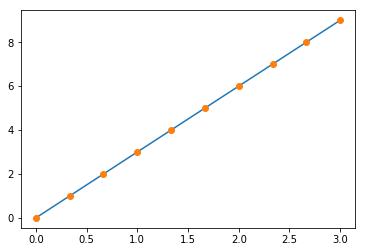

In [148]:
x = np.linspace(0, 3, 10)
y = np.linspace(0, 9, 10)
plt.plot(x, y) # line
plt.plot(x, y, 'o') # dots
plt.show() # not needed with inline magic

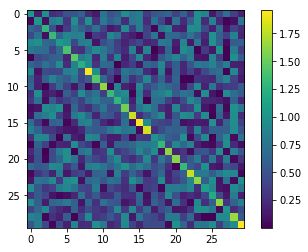

In [216]:
image = np.eye(30) + np.random.rand(30, 30)
plt.imshow(image) # colors: cmap=plt.cm.*** 
plt.colorbar()
plt.show()